In [1]:
import numpy as np
import matplotlib.pyplot as plt
from models.vibrating_string import Vibrating_string
from models.diffusion_equation import SimulationGrid
from models.methods import gauss_seidel, sor, jacobi

SyntaxError: positional argument follows keyword argument (diffusion_equation.py, line 65)

# Set 1

## 1.1 Vibrating string

### A: Discretization

A. (0.5 point) Discretize the wave equation, and write it in a form suitable for
implementing in a computer program. Assume that the boundaries are fixed, Ψ(x =
0, t) = 0, Ψ(x = L, t) = 0. L is the length of the string. Take L = 1 for simplicity.
Divide the string in N intervals, so that the interval length is ∆x = L/N . Also
consider the boundary cases.

### B: Plots

B. (1 point) Implement the time stepping. Determine the time development of
the string, with the following initial conditions. The string is at rest at t = 0, i.e.
Ψ′(x, t = 0) = 0.
i. Ψ(x, t = 0) = sin(2πx).
ii. Ψ(x, t = 0) = sin(5πx).
iii. Ψ(x, t = 0) = sin(5πx) if 1/5 < x < 2/5, else Ψ = 0.
Take c = 1 and use the time step ∆t = 0.001. Plot the result at several times in
the same ﬁgure, e.g. varying the color of the curve

In [4]:
def plotter(ax,string,time_plot = [0.0,1.25,2.5,4.3,7.2,10]):
    """
    Does the stepping scheme over time and plots every "step_plot"
    Inputs:
        -   step_plot: How many iterations between plots, 100 by default
    """

    for time_step in range(string.n_steps):

        if time_step*string.tao  in time_plot:
            
            ax.plot(string.x,string.data[time_step], label = f"Time = {string.tao*time_step}")
    ax.legend()
    ax.set_xlabel("x")
    ax.set_ylabel("Amplitude")

#### $sin(2 \cdot \pi \cdot x)$

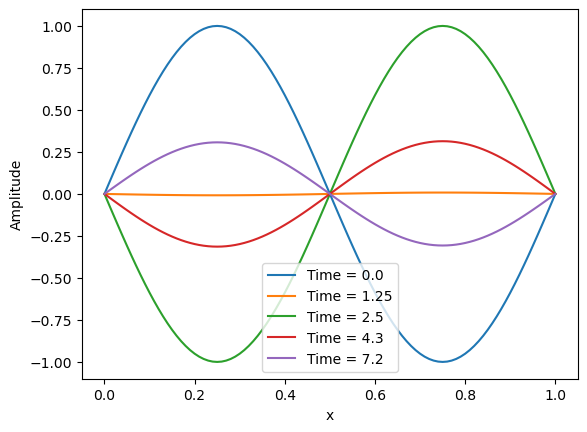

In [18]:
string = Vibrating_string(mode = 1,N = 100,T = 10)
plotter(string)


#### $sin(5 \cdot \pi \cdot x)$

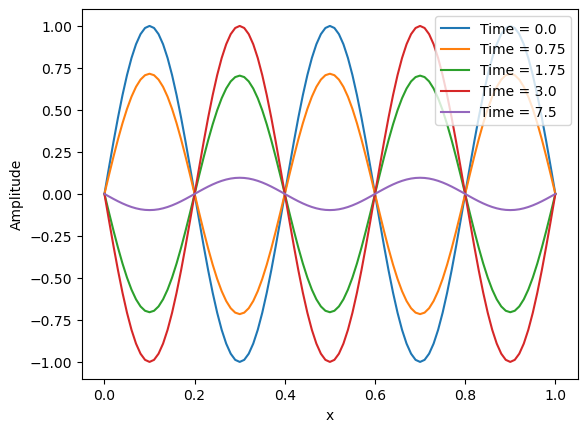

In [31]:
string = Vibrating_string(mode = 2,N = 100,T = 10)
plotter(string, time_plot = [0.0,0.75,1.75,3.0,7.5])

#### $sin(5 \cdot \pi \cdot x)$ if $1/5 <x<2/5$

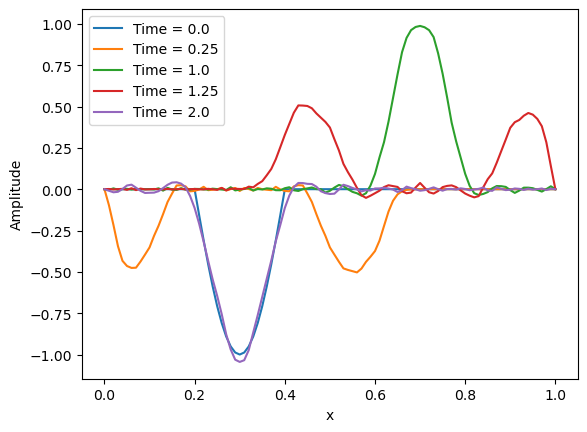

In [43]:
string = Vibrating_string(mode = 3,N = 100,T = 10)
plotter(string, time_plot = [0.0,0.25,1.,1.25,2])

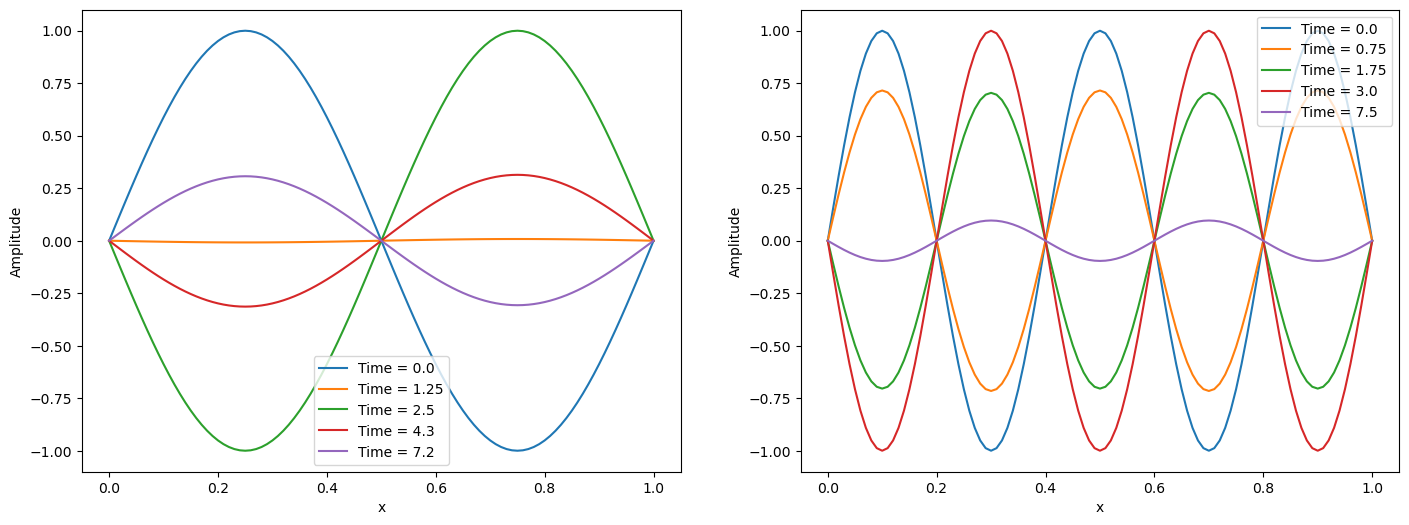

In [12]:
fig,axs = plt.subplots(1,2, figsize = (17,6))


string = Vibrating_string(mode = 1,N = 100,T = 10)
plotter(axs[0],string)

string = Vibrating_string(mode = 2,N = 100,T = 10)
plotter(axs[1],string, time_plot = [0.0,0.75,1.75,3.0,7.5])



### C: Animated plots

C. (1 point) Make an animated plot of the time development. This can be done
from within matplotlib, 

#### $sin(2 \cdot \pi \cdot x)$

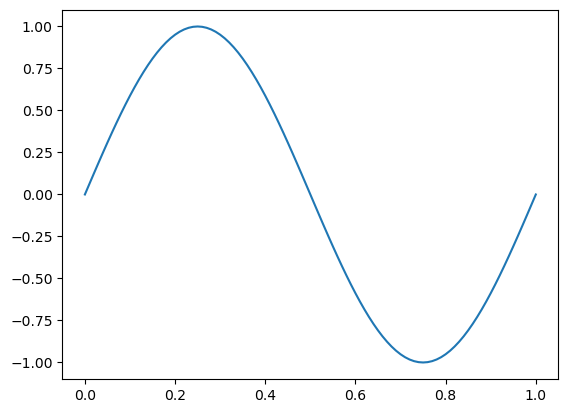

c:\Users\joann\anaconda3\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [2]:
string = Vibrating_string(mode = 1,N = 100,T = 100)
string.animation()

#### $sin(5 \cdot \pi \cdot x)$

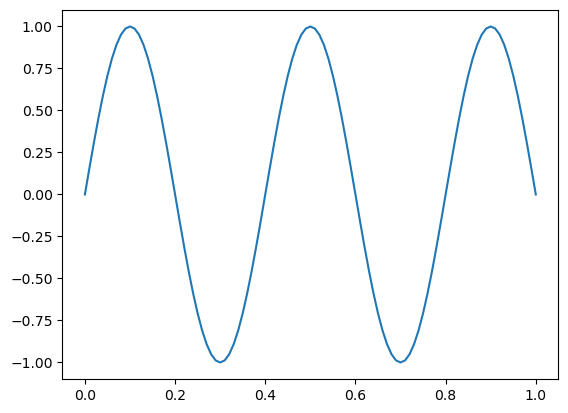

c:\Users\joann\anaconda3\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [6]:
string = Vibrating_string(mode = 2,N = 100,T = 100)
string.animation()

#### $sin(2 \cdot \pi \cdot x)$ if $1/5 < x < 2/5$

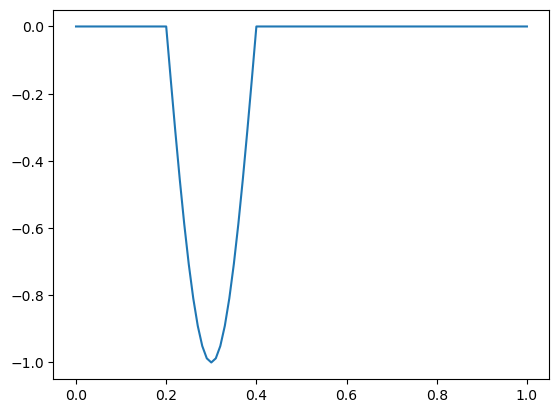

In [7]:
string = Vibrating_string(mode = 3,N = 100,T = 100)
string.animation()

## 1.2. The Time Dependent Diffusion Equation

### D

D. (0.5 point) Determine the equation to use at the boundaries of the domain.
Clearly show the ranges of the indices of the grid. A ﬁgure is extremely helpful for
ﬁguring this out

------

### E


E. (1 point) Test the correctness of your simulation. Compare to the analytic
solutions, plot c(y) for diﬀerent times. The analytic solution i

In [2]:
dif = SimulationGrid(50)

In [3]:
time_show = [0.001, 0.01, 0.1, 1] 
dif.time_dependent(t = 1,time_list = time_show)

[nan, -0.3767888411519887, -0.1409865325942935, 0.009978991206833493]


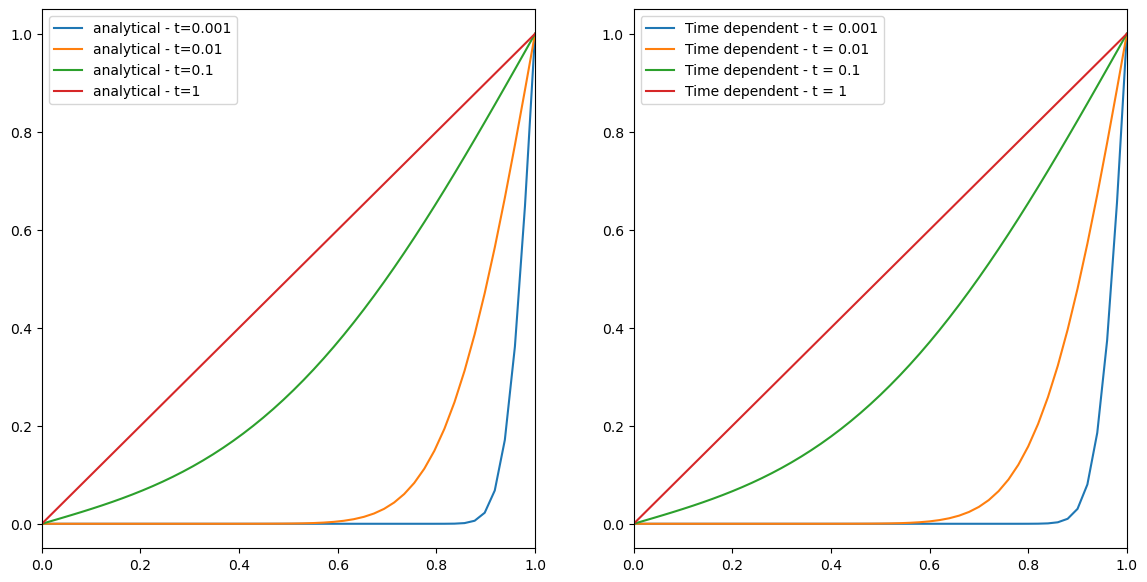

In [15]:
fig,axs = plt.subplots(1,2, figsize =(14,7))
errors = []

for t in time_show:
    result = dif.c_analytical(t)
    text = f"analytical - t={t}"
    axs[0].plot(np.linspace(0,1,num= len(result)),result,label=text)
    
values_1 = np.array(values)
for t,d in enumerate(dif.data_especial):
    text = f"Time dependent - t = {time_show[t]}"
    axs[1].plot(np.linspace(0,1,num= len(d[::-1,1])),d[::-1,1],label=text)
    
axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[0].legend()
axs[1].legend()
print(errors)
plt.show()


### F

F. (1 point) Plot the results, show the 2D domain, with a color representing the
concentration at each point. Make a plot of the state of the system at several times:
t = {0, 0.001, 0.01, 0.1, and 1}.

In [30]:
test = SimulationGrid(50)
time_show = [0.001, 0.01, 0.1, 1] 
dif.time_dependent(t = 1,time_list = time_show)

KeyboardInterrupt: 

IndexError: index 4 is out of bounds for axis 0 with size 4

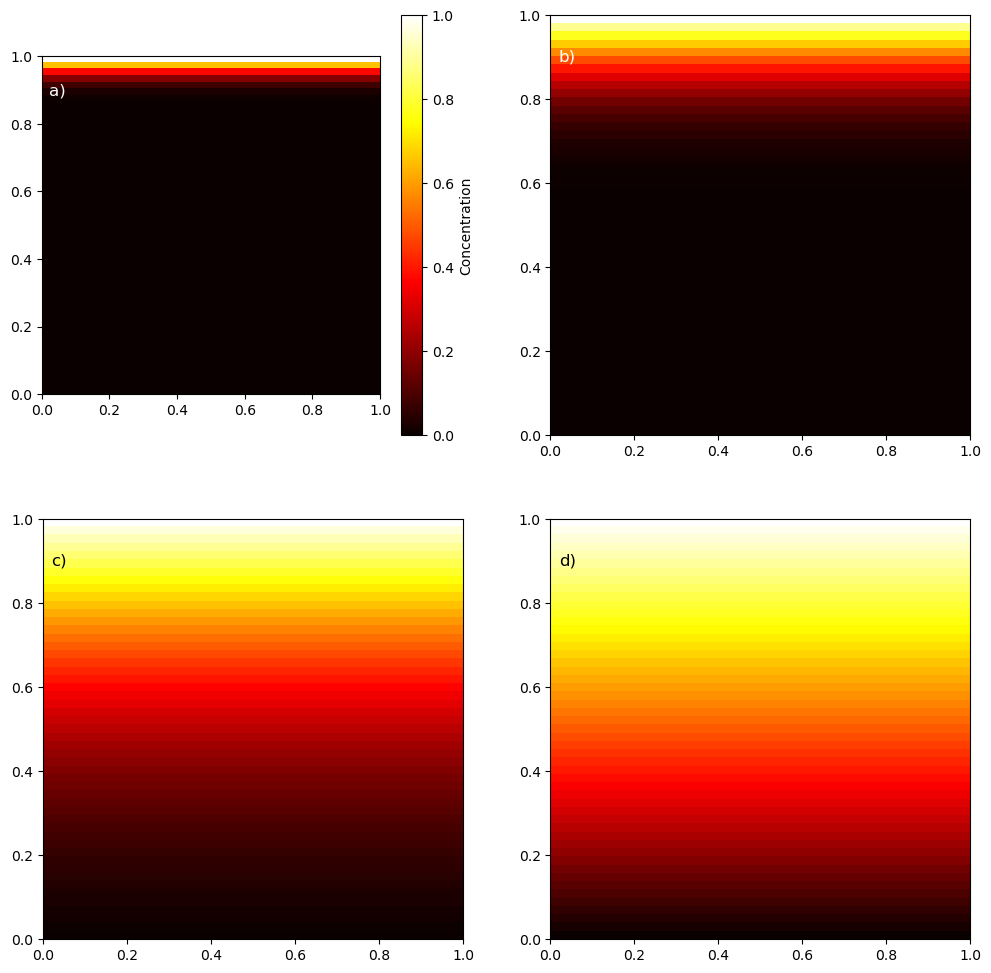

In [34]:
fig,axs = plt.subplots(2,2,figsize = (12,12))
axs = axs.flatten()
labels = ["a","b","c","d"]

for t,d in enumerate(dif.data_especial):

    img = axs[t].imshow(d, cmap='hot', interpolation='nearest', extent=[0, 1, 0, 1])
    if t <2:
        axs[t].text(0.02, 0.92, labels[t] + ')', transform=axs[t].transAxes,
                    fontsize=12, verticalalignment='top', color='white')
    if t>=2:
        axs[t].text(0.02, 0.92, labels[t] + ')', transform=axs[t].transAxes,
            fontsize=12, verticalalignment='top', color='black')
    if t == 0:
        cbar = plt.colorbar(img, ax=axs[t])
        cbar.set_label('Concentration')


### G

1 point) Make an animated plot of the time dependent diﬀusion equation until
equilibrium

### H

(1 point) Implement the Jacobi iteration, the Gauss-Seidel method and SOR.
Try N = 50. Test the methods by comparing the result to the analytical result in
eq. (5), i.e. the linear dependence of the concentration on y

In [3]:
N = 50
dif = SimulationGrid(50)

#### Analytical

TypeError: jacobi() missing 1 required positional argument: 'stop'

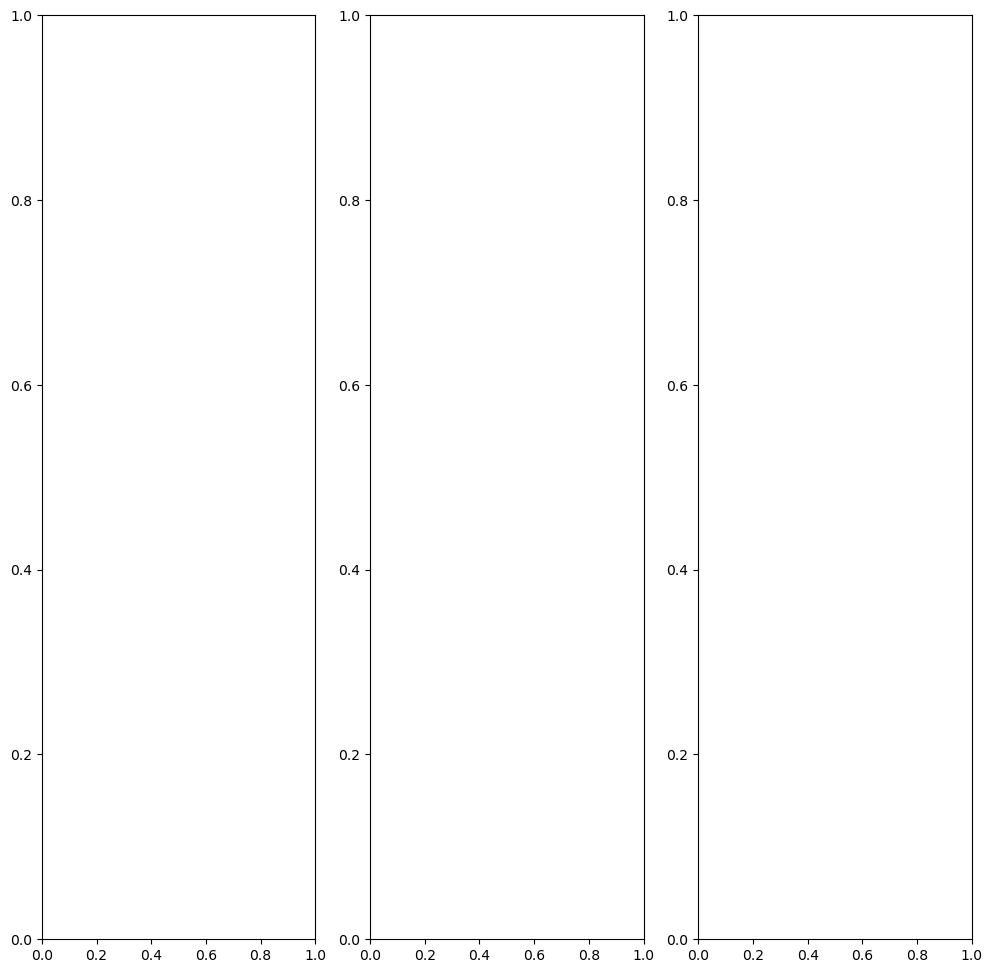

In [5]:
N = 50
dif = SimulationGrid(50)
fig,axs = plt.subplots(1,3, figsize = (12,12))
axs = axs.flatten()
y_input = np.linspace(0,1,50)
time_show = [0.001, 0.01, 0.1, 1] 

dif.time_independent(jacobi,stop = 0.0001)

shape = len(dif.data)
positions = [int(shape*0.01) -1,int(shape*0.1) -1,int(shape*0.1)-1,shape-1]
data = dif.data[int(shape*0.001) -1], dif.data[int(shape*0.01) -1], dif.data[int(shape*0.1)-1],dif.data[shape-1]

for i,d in enumerate(data):
    text = f"Jacobi-t = {time_show[i]}"
    axs[0].plot(d[::-1,1], label = text)
axs[0].legend()
        


dif.time_independent(gauss_seidel, stop = 0.0001)
shape = len(dif.data)
positions = [int(shape*0.01) -1,int(shape*0.1) -1,int(shape*0.1)-1,shape-1]

data = dif.data[int(shape*0.001) -1], dif.data[int(shape*0.01) -1], dif.data[int(shape*0.1)-1],dif.data[shape-1]
for i,d in enumerate(data):
    text = f"Gauss-seidel -t = {time_show[i]}"
    axs[1].plot(d[::-1,1],label=text)
axs[1].legend()


dif.time_independent(sor,w =1/3, stop = 0.0001)
shape = len(dif.data)
positions = [int(shape*0.01) -1,int(shape*0.1) -1,int(shape*0.1)-1,shape-1]
data = dif.data[int(shape*0.001) -1], dif.data[int(shape*0.01) -1], dif.data[int(shape*0.1)-1],dif.data[shape-1]
for i,d in enumerate(data):
    text = f"SOR -t = {time_show[i]}"
    axs[2].plot(d[::-1,1],label=text)
axs[2].legend()
plt.show()

#### SOR